<a href="https://colab.research.google.com/github/albatellouc3m/P1_AA/blob/main/P1_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar datos**

Primeramente tenemos que leer los datos en local (archivos de google colab) En nuestro caso, hemos elegido el NIA 100495755, donde los dos últimos dígitos son 5 y 5. Por lo que nuestro dataset seria el número 10 (5 + 5 = 10).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_generales = pd.read_csv('./attrition_availabledata_10.csv.gz')
datos_test = pd.read_csv('./attrition_competition_10.csv.gz') # Datos para realizar el test

datos_generales.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13,3,3,3.0,3.0,3.0,48,Travel_Rarely,Research & Development,...,Y,13,8,1,18.0,2,8,7,7,No
1,7.488597,6,1,3,3.0,4.0,4.0,31,Travel_Frequently,Research & Development,...,Y,17,8,1,3.0,2,1,0,0,Yes
2,7.116541,16,2,4,1.0,1.0,3.0,36,Travel_Rarely,Research & Development,...,Y,24,8,0,6.0,6,5,0,3,No
3,9.709125,6,3,4,3.0,3.0,3.0,49,Travel_Rarely,Research & Development,...,Y,22,8,0,25.0,2,7,0,7,No
4,6.297729,6,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No


#**EDA** **Simplificado**




Antes de realizar el preprocesado de datos, debemos analizar el set de datos para sacar información importante para el ejercicio. Los pasos de este análisis son los siguientes:

## ¿Cuantas variables e instancias hay?

  El set de availabledata contiene un total de 2940 instancias y 31 variables. Para calcularlo hemos utilizado el comando *shape*.  


In [ ]:
from IPython.display import display

display(datos_generales.shape)

(2940, 31)

##Tipos de variables

 En el conjunto de datos propuesto para el ejercicio se pueden identificar varios tipos de variable. Para mostrarlos usamos el comando *dtype*, el cual te muestra cada variable con su tipo.



In [ ]:
from IPython.display import display

display(datos_generales.dtypes)

,0
hrs,float64
absences,int64
JobInvolvement,int64
PerformanceRating,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
BusinessTravel,object
Department,object


##Variables categóricas con alta cardinalidad

  Debemos estudiar si hay variables categóricas con alta cardinalidad, es decir, variables que toman un gran número de valores distintos, ya que estas variables pueden causar problemas y hacer que el modelo sea más complejo.

  El código para identificarlas es el siguiente:

In [ ]:
for col in datos_generales.select_dtypes(include=['object']).columns:
    print(f'{col}: {datos_generales[col].nunique()} valores únicos')

BusinessTravel: 3 valores únicos
Department: 3 valores únicos
EducationField: 6 valores únicos
Gender: 2 valores únicos
JobRole: 9 valores únicos
MaritalStatus: 3 valores únicos
Over18: 1 valores únicos
Attrition: 2 valores únicos


##¿Que variables tienen valores faltantes y cuantos?

  Para saber que variables tienen valores faltantes, es decir que en alguna de las instancias no tenga valor asignado, utilizamos el comando *isnull*.

In [ ]:
datos_generales.isnull().sum() # Añadimos el sum para que nos muestre una cuenta total de valores nulos y no uno por uno

,0
hrs,0
absences,0
JobInvolvement,0
PerformanceRating,0
EnvironmentSatisfaction,15
JobSatisfaction,12
WorkLifeBalance,29
Age,0
BusinessTravel,0
Department,0


## Columnas constantes o de id

  Columnas constantes son aquellas que tienen el mismo valor para todas las instancias del conjunto de datos.

  Por otro lado, columnas de id son aquellas que contienen identificadores únicos para cada instancia.

  En nuestro conjunto de datos, la primera columna es de ID y podemos usar el comando nunique. Ya que en la pregunta 3 lo necesitabamos, vimos en el resultado que la variable Over18 es constante, y por lo tanto, no aporta información útil en el desarrollo del ejercicio.
  

##Regresion o clasificación:

  Se trata de un problema de clasificación, ya que la columna de clases no contiene valores reales. Además vemos que está completamente desbalanceado ya que tenemos 474 valores de attrition 'No' y 2466 de 'Yes'. El código para esta resolución es el siguiente:

In [ ]:
# Creamos contadores para cada valor
contador_yes = 0
contador_no = 0

# Recorremos todas las instancias de Attrition y vemos cuantos de cada valor hay
for valor in datos_generales['Attrition']:
    if valor == 'Yes':
        contador_yes += 1
    elif valor == 'No':
        contador_no += 1

print(f'Yes: {contador_yes}')
print(f'No: {contador_no}')


Yes: 474
No: 2466


# **3. DECIDIR CÓMO SE VA A REALIZAR LA EVALUACIÓN**

El objetivo de esta sección es definir correctamente la estrategia de evaluación del modelo, asegurando que los resultados sean fiables y reproducibles. Se propone un enfoque de doble nivel de evaluación:


1.   Evaluación Outer (Holdout): Para estimar el rendimiento futuro real del modelo.
2.   Evaluación Inner (Cross Validation): Para comparar modelos y realizar optimización de hiperparámetros (HPO) dentro de la partición de entrenamiento (train).



## 3.1 Visión general del proceso
El siguiente esquema muestra el flujo de evaluación:
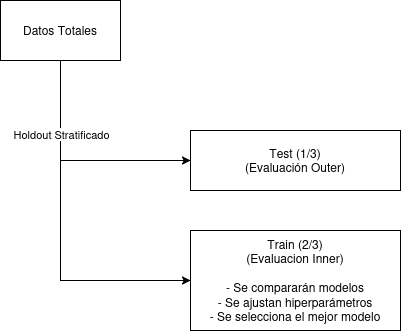




1.   Partición en Holdout

*   Se divide el conjunto de datos en 2/3 para train y 1/3 para test, manteniendo la proporción de la variable objetivo (stratify).
*   El conjunto train se usará durante la mayor parte de la práctica (para comparar modelos, probar hiperparámetros, etc.).
*   El conjunto test se usará solo al final, para obtener la estimación real de rendimiento del modelo final (outer).


2.   Elemento de lista
3.   Elemento de lista



## Evaluación Outer
En esta sección se describe el proceso de evaluación outer, cuyo propósito es medir el desempeño real del modelo tras su entrenamiento. Esta evaluación es fundamental, ya que permite conocer cómo responderá el modelo ante datos nuevos. Para ello, se usará el método Holdout, que divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluarlo.

La división de los datos en Holdout se hará así: dos tercios (2/3) se usarán para train y un tercio (1/3) para test. Es clave mantener la proporción original de la variable objetivo (Attrition), ya que hay un desbalance entre los empleados que renuncian y los que no. Para lograrlo, se aplicará un método de estratificación en la partición.

In [ ]:
from sklearn.model_selection import train_test_split

# Convertimos la variable objetivo en valores binarios: 'Yes' -> 1, 'No' -> 0
datos_generales['Attrition'] = datos_generales['Attrition'].map({'Yes': 1, 'No': 0})

# Definir las características (X) y la variable objetivo (y)
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])  # Eliminamos columnas irrelevantes
y = datos_generales['Attrition']

# División en 2/3 entrenamiento y 1/3 test, con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10, stratify=y)

# Verificar la distribución de la variable objetivo en los conjuntos generados
print("Distribución en Train:\n", y_train.value_counts(normalize=True))
print("\nDistribución en Test:\n", y_test.value_counts(normalize=True))


Distribución en Train:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

Distribución en Test:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


##Definición de Métricas de Evaluación

La métrica principal para evaluar el modelo será la Balanced Accuracy, útil en problemas de clasificación desbalanceada. Se obtiene como el promedio del True Positive Rate (TPR) y el True Negative Rate (TNR).


El True Positive Rate (TPR), indica la proporción de empleados que renunciaron y fueron clasificados correctamente. Se calcula como:

$TPR = \frac{TP}{TP + FN}$

donde:


*   TP: son los empleados que realmente renunciaron y el modelo los predijo correctamente.
*   FN: son los empleados que renunciaron pero que el modelo los predijo incorrectamente, como que se quedaron.



El True Negative Rate (TNR) mide la proporción de empleados que no renunciaron y fueron clasificados correctamente:

$TPR = \frac{TN}{TN + FP}$

donde:

  

*     TN: empleados que no renunciaron y fueron clasificados correctamente.
*     FP: empleados que no renunciaron pero fueron clasificados como renunciantes.






La Balanced Accuracy se obtiene con la siguiente fórmula:

$BalancedAccuracy = \frac{TPR+TNR}{2}$

Esta métrica es más fiable que la Accuracy estándar en datos desbalanceados, ya que evita sesgos hacia la clase mayoritaria.

Otras métricas que se calcularán incluyen:

*   Accuracy, que mide la proporción total de predicciones correctas.
*   Matriz de confusión, que detalla los aciertos y errores del modelo en ambas clases.




Como todavia no tenemos un modelo entrenado vamos a utilizar un Dummy Classifier como base para generar resultados iniciales:

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

# Crear un modelo Dummy que siempre predice la clase mayoritaria
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

# Hacer predicciones con el modelo dummy
y_pred_dummy = dummy_model.predict(X_test)

# Calcular métricas para el modelo dummy
acc_dummy = accuracy_score(y_test, y_pred_dummy)
balanced_acc_dummy = balanced_accuracy_score(y_test, y_pred_dummy)
tnr_dummy = confusion_matrix(y_test, y_pred_dummy)[0, 0] / confusion_matrix(y_test, y_pred_dummy)[0].sum()
tpr_dummy = confusion_matrix(y_test, y_pred_dummy)[1, 1] / confusion_matrix(y_test, y_pred_dummy)[1].sum()

# Mostrar resultados del modelo dummy
print("Dummy Classifier - Modelo Trivial")
print("Accuracy:", acc_dummy)
print("Balanced Accuracy:", balanced_acc_dummy)
print("TPR:", tpr_dummy)
print("TNR:", tnr_dummy)
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_dummy))


Dummy Classifier - Modelo Trivial
Accuracy: 0.8387755102040816
Balanced Accuracy: 0.5
TPR: 0.0
TNR: 1.0

Matriz de Confusión:
 [[822   0]
 [158   0]]


Este modelo sirve como una línea base mínima para comparar con modelos más avanzados más adelante.

## Evaluación inner
La evaluación interna (inner) se aplicará dentro del conjunto de entrenamiento (X_train, y_train) para comparar modelos y ajustar hiperparámetros.

Para esto, se usará validación cruzada (Cross Validation - CV), un método que divide el conjunto de entrenamiento en varias partes, permitiendo entrenar y validar el modelo en diferentes combinaciones de datos. Así se obtiene una evaluación más confiable antes de seleccionar el modelo final.

Se empleará K-Fold Stratificado (k=5), que mantiene la proporción de clases en cada partición. Su propósito será:

*   Comparar modelos como KNN o Árboles de Decisión.
*   Ajustar hiperparámetros con GridSearchCV o RandomizedSearchCV.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score

# Convertimos la variable objetivo en valores binarios: 'Yes' -> 1, 'No' -> 0
datos_generales['Attrition'] = datos_generales['Attrition'].map({'Yes': 1, 'No': 0})

# Cambiamos los valores Nans por valores estimados para evitar borrar instancias
# Check if mode is not empty before accessing index 0
if not datos_generales['Attrition'].mode().empty:
    moda_attrition = datos_generales['Attrition'].mode()[0]
else:
    # Handle the case when mode is empty (e.g., impute with a default value)
    moda_attrition = 0  # or any other appropriate value

datos_generales['Attrition'].fillna(moda_attrition, inplace=True)

# Definir las características (X) y la variable objetivo (y)
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

# Crear un objeto StratifiedKFold con k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=495774)

# Iterar sobre los folds
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1}:")

    # Obtener los datos de entrenamiento y validación para este fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entrenar un modelo (ejemplo con DummyClassifier)
    model = DummyClassifier(strategy="most_frequent")
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de validación
    y_pred = model.predict(X_val)

    # Calcular la métrica de evaluación (ejemplo con Balanced Accuracy)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    print(f"  Balanced Accuracy: {balanced_acc}")
    print("-" * 30)

NameError: name 'datos_generales' is not defined

# **4.Métodos básicos: KNN y TREES**



In [ ]:
import pandas as pd
from IPython.display import display
# Suponiendo que tu dataset se llama 'datos_generales'
categorical_columns = datos_generales.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir las columnas categóricas
print("Columnas categóricas:")
display(categorical_columns)

# Suponiendo que tu dataset se llama 'datos_generales'
for column in datos_generales.columns:
    unique_values = datos_generales[column].unique()
    print("Valores únicos para la columna:")
    display(unique_values)

Columnas categóricas:


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

Valores únicos para la columna:


array([7.46229697, 7.48859661, 7.11654061, ..., 5.86131415, 9.02572066,
       6.70904953])

Valores únicos para la columna:


array([13,  6, 16, 21, 14, 17,  7, 12,  4,  8, 19, 23, 15, 20, 10,  9, 18,
        3,  5, 22,  2, 11,  1, 24])

Valores únicos para la columna:


array([3, 1, 2, 4])

Valores únicos para la columna:


array([3, 4])

Valores únicos para la columna:


array([ 3.,  1.,  4.,  2., nan])

Valores únicos para la columna:


array([ 3.,  4.,  1.,  2., nan])

Valores únicos para la columna:


array([ 3.,  4.,  2.,  1., nan])

Valores únicos para la columna:


array([48, 31, 36, 49, 40, 52, 27, 47, 29, 35, 37, 33, 23, 45, 26, 34, 53,
       50, 56, 32, 46, 25, 39, 24, 20, 30, 58, 44, 28, 59, 43, 54, 21, 22,
       51, 41, 38, 42, 57, 19, 55, 18, 60])

Valores únicos para la columna:


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

Valores únicos para la columna:


array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

Valores únicos para la columna:


array([12,  2, 14,  1, 10, 29,  3, 25,  5, 23, 20,  4,  7,  6, 27, 15, 26,
        9, 22, 19, 13,  8, 24, 16, 28, 21, 18, 17, 11])

Valores únicos para la columna:


array([4, 2, 3, 5, 1])

Valores únicos para la columna:


array(['Medical', 'Other', 'Life Sciences', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

Valores únicos para la columna:


array([1])

Valores únicos para la columna:


array([2316, 2193, 1846, ...,  213, 1490,  510])

Valores únicos para la columna:


array(['Male', 'Female'], dtype=object)

Valores únicos para la columna:


array([1, 2, 3, 4, 5])

Valores únicos para la columna:


array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Manager', 'Sales Executive',
       'Human Resources', 'Research Director',
       'Healthcare Representative', 'Sales Representative'], dtype=object)

Valores únicos para la columna:


array(['Divorced', 'Single', 'Married'], dtype=object)

Valores únicos para la columna:


array([ 55620,  53960,  39290, ...,  28000,  75530, 170680])

Valores únicos para la columna:


array([ 8.,  7.,  0.,  1.,  3.,  4.,  5.,  9.,  2.,  6., nan])

Valores únicos para la columna:


array(['Y'], dtype=object)

Valores únicos para la columna:


array([13, 17, 24, 22, 11, 19, 12, 15, 14, 23, 20, 16, 21, 25, 18])

Valores únicos para la columna:


array([8])

Valores únicos para la columna:


array([1, 0, 3, 2])

Valores únicos para la columna:


array([18.,  3.,  6., 25.,  8.,  9., 16., 27., 11., 22., 10., 14.,  7.,
        4.,  1., 17., 35., 12., 36., 19.,  5.,  2., 20., 30., 15., 13.,
       29., 23., 24., 38., 40., 21., 32., 26., 31., nan,  0., 37., 28.,
       34., 33.])

Valores únicos para la columna:


array([2, 6, 3, 1, 4, 5, 0])

Valores únicos para la columna:


array([ 8,  1,  5,  7,  6, 15,  3, 14,  9,  4, 17, 16,  2, 20, 11,  0, 12,
       21, 10, 37, 23, 22, 31, 13, 19, 18, 26, 25, 29, 27, 24, 33, 36, 40,
       32, 34])

Valores únicos para la columna:


array([ 7,  0,  3,  1,  5,  2,  8,  6, 11,  9,  4, 14, 13, 12, 10, 15])

Valores únicos para la columna:


array([ 7,  0,  3,  4, 11,  2,  8,  1, 10, 12,  5,  9,  6, 14, 17, 13, 16,
       15])

Valores únicos para la columna:


array([0.])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.compose import ColumnTransformer

# Definir las características (X) y la variable objetivo (y)
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

# Definir las columnas categóricas
categorical_features = ['Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus', 'BusinessTravel']

# Reemplazar valores categóricos con valores numéricos usando replace
for feature in categorical_features:
    unique_values = X[feature].unique()
    value_mapping = {value: i for i, value in enumerate(unique_values)}
    X[feature] = X[feature].replace(value_mapping)

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)])

# Crear el pipeline con el preprocesamiento y el modelo KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Definir los parámetros para GridSearchCV
param_grid = {
    'preprocessor__num__strategy': ['mean', 'median'],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Crear un objeto StratifiedKFold para la validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=495774)

# Crear un objeto GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=skf, verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (Balanced Accuracy):", grid_search.best_score_)
print("Mejor estimador:", grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


<ipython-input-17-a7350a3d200e>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[feature] = X[feature].replace(value_mapping)


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 434, in fit
    X = self._validate_input(X, in_fit=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 361, in _validate_input
    raise new_ve from None
ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Travel_Rarely'

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 434, in fit
    X = self._validate_input(X, in_fit=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 361, in _validate_input
    raise new_ve from None
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Travel_Rarely'
